In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Visão Geral dos Casos Confirmados

#### Filtrando apenas os casos confirmados.

In [151]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)
#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [152]:
qtd_atributos =    len(df.columns)
atributos     =    list(df.columns)
lst_atributos = ""
for i in atributos:
    lst_atributos += i + "\n"

print("Cada exemplo possui "+str(qtd_atributos)+" atributos ,são eles: \n"+lst_atributos )

Cada exemplo possui 39 atributos ,são eles: 
_dt_evolucao
_dt_notificacao
_dt_sintomas
_classificacao
_conclusao
_origem
_comorb_cardio
_comorb_cromossomica
_comorb_diabetes
_comorb_hemato
_comorb_hepatica
_comorb_imuno
_comorb_neurologica
_comorb_obessidade
_comorb_renal
_comorb_respiratoria
_criterio
_etnia
_evolução
_idade
_faixa etária
_gestante
_profiss_saude
_raca
_se_notificacao
_sexo
_sintoma_dispneia
_sintoma_febre
_sintoma_garganta
_sintoma_tosse
_sintoma_outros
_srag
_teste_anticorpo
_teste_antigeno
_teste_pcr
_bairro
_bairro_mapa
_distrito
_taxa



2. Quantos casos confirmados há em Manaus, cumulativamente?

In [153]:
casos_confirmados = len(df)
casos_confirmados
print("Existem "+str(casos_confirmados)+" casos confirmados.")

Existem 80420 casos confirmados.


3-  A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o
mais recente? Leve em conta a data de notificação.

In [154]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'])
dt_antiga             = df['_dt_notificacao'].min()
dt_recente            = df['_dt_notificacao'].max()
print("A base de dados está compreendida entre as datas, "+str(dt_antiga)+" e "+str(dt_recente))


A base de dados está compreendida entre as datas, 2020-01-04 00:00:00 e 2020-12-29 00:00:00


Para fins da análise considerada no escopo deste projeto, vamos excluir todos os atributos relativos
às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros
que não estiverem envolvidos no contexto do trabalho solicitado. Estes atributos serão considerados
irrelevantes para fins de simplificação. Exclua todas as linhas em que houver dados faltantes para os
atributos remanescentes.

In [155]:
df = df.drop(df.filter(regex='comorb|sintoma|etnia|profissão|dt_evolucao|dt_sintomas|origem|raca|gestante|srag|_profiss_saude|criterio|evolução|faixa_etaria|teste|taxa|faixa|se_notificacao').columns, axis=1).dropna()


1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [156]:
exemplos  = len(df)
atributos = len(df.columns)
print("Existem "+str(exemplos)+" exemplos e , "+str(atributos)+" atributos")

Existem 41675 exemplos e , 8 atributos


In [157]:
df

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_bairro,_bairro_mapa,_distrito
130,2020-02-23,Confirmado,Recuperado,12.0,F,MAUAZINHO,MAUAZINHO,LESTE
144,2020-02-28,Confirmado,Recuperado,39.0,F,NOVO ALEIXO,NOVO ALEIXO,NORTE
153,2020-02-03,Confirmado,Recuperado,2.0,F,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,SUL
158,2020-02-03,Confirmado,Recuperado,71.0,F,FLORES,FLORES,SUL
196,2020-11-03,Confirmado,Recuperado,46.0,F,CIDADE NOVA,CIDADE NOVA,NORTE
...,...,...,...,...,...,...,...,...
225148,2020-10-14,Confirmado,Recuperado,42.0,F,CAMPOS SALES,TARUMÃ,OESTE
225149,2020-12-09,Confirmado,Recuperado,23.0,F,ALEIXO,ALEIXO,SUL
225153,2020-08-10,Confirmado,Recuperado,48.0,F,MORRO DA LIBERDADE,MORRO DA LIBERDADE,SUL
225159,2020-11-27,Confirmado,Recuperado,55.0,M,FLORES,FLORES,SUL


In [158]:
recuperados  = (df._conclusao == 'Recuperado').sum()
total        = len(df)
porc         = recuperados / total*100
print("Total de recuperados em porcentagem "+str(porc)+"%")

Total de recuperados em porcentagem 91.89202159568086%


3. Os casos acometeram mais indivíduos do sexo masculino ou feminino?

R = Indivíduos do sexo feminino.

In [159]:
df['_sexo'].value_counts()

F    22357
M    19318
Name: _sexo, dtype: int64

4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o
indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [160]:
media_idade         = np.mean(df['_idade'])
desvio_padrão       = np.std(df['_idade'])
jovem                = np.min(df['_idade'])
idoso               = np.max(df['_idade'])
print( "A média de idade: "+str(media_idade)+
       "\nDesvio padrão: "+str(desvio_padrão)+
       "\nO indivíduo mais jovem: "+str(jovem)+
       "\nO indivíduo mais idoso: "+str(idoso)

      )

A média de idade: 43.47652069586083
Desvio padrão: 17.376150335788605
O indivíduo mais jovem: 0.0
O indivíduo mais idoso: 120.0


5. Qual o bairro com maior incidência de casos?

In [161]:
bairro_maior     = df['_bairro'].value_counts().index[0]
qtd_bairro_maior = df['_bairro'].value_counts()[0]
print("bairro com maior incidencia: "+str(bairro_maior))

bairro com maior incidencia: SAO JOSE OPERARIO


In [162]:
incidencias = list(df['_bairro'].value_counts().index[:3])
print("3 bairros com maior incidencias: "+str(incidencias))

3 bairros com maior incidencias: ['SAO JOSE OPERARIO', 'JORGE TEIXEIRA', 'CIDADE NOVA']


7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa
e percentual.



In [163]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)
#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

tipos_testest = list(df.columns.str.extract(r'(^_teste.*$)', expand=False).dropna())
qtd_teste_anticoropo = df['_teste_anticorpo'].sum()
qtd_teste_antigeno   = df['_teste_antigeno'].sum()
qtd_teste_pcr   = df['_teste_pcr'].sum()
total_teste = qtd_teste_anticoropo+qtd_teste_antigeno+qtd_teste_pcr

print("Os tipos de testes efetuados são: ", tipos_testest)
print("Teste Anticorpo: "+str(qtd_teste_anticoropo)+" testes realizados, correspondendo a "+str((qtd_teste_anticoropo/total_teste)*100)+" % do total")
print("Teste Antigeno: "+str(qtd_teste_antigeno)+" testes realizados, correspondendo a "+str((qtd_teste_antigeno/total_teste)*100)+" % do total")
print("Teste PCR: "+str(qtd_teste_pcr)+" testes realizados, correspondendo a "+str((qtd_teste_pcr/total_teste)*100)+" % do total")


Os tipos de testes efetuados são:  ['_teste_anticorpo', '_teste_antigeno', '_teste_pcr']
Teste Anticorpo: 65051.0 testes realizados, correspondendo a 62.09882200202379 % do total
Teste Antigeno: 9066.0 testes realizados, correspondendo a 8.654562116959735 % do total
Teste PCR: 30637.0 testes realizados, correspondendo a 29.246615881016474 % do total


8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta
taxa, considere a fração do total de óbitos pelo total de casos;

In [164]:
df = pd.read_csv("Manaus.csv", sep = ";", low_memory = False)
#Filtrando apenas os casos confirmados.
filtro  = df['_classificacao'] == "Confirmado"
confirmados = df[filtro]
df = confirmados 

taxa_letalidade = ( len(df[df['_conclusao']=='Óbito'])/len(df) )*100
print("Taxa de Letalidade: "+str(taxa_letalidade)+str("%"))

Taxa de Letalidade: 4.160656553096245%


9 - Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o
número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue
o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é
positiva ou negativa, e qual sua intensidade.

In [165]:
dados_agrupados = df.groupby(by='_idade').size()
dados_agrupados = dados_agrupados.reset_index(name="correlacao")
correlacao = dados_agrupados.corr()

print( "A correlação "+str(correlacao._idade.loc['correlacao'])+" nos mostra que que a idade e o número de casos não possuem uma relação linear forte.")

A correlação -0.3959859763213944 nos mostra que que a idade e o número de casos não possuem uma relação linear forte.


# 2.2 - Vizualização dos Dados




### Importanto bibliotecas e acessando a Base de Dados

#### Acesso da Base de Dados no dia: 11/10/2021

In [166]:
### Abrindo o DataSet
#### Modificações Iniciais da Base

data = pd.read_csv('Manaus.csv',sep=';', header=None, skiprows=0)

C:\Users\sabrj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,28,29,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [167]:
data.columns = data.iloc[0]

In [168]:
data = data.drop(0)

In [169]:
data.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,...,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
1,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
2,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
3,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
4,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
5,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243984 entries, 1 to 243984
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   _dt_evolucao          119011 non-null  object
 1   _dt_notificacao       243913 non-null  object
 2   _dt_sintomas          235760 non-null  object
 3   _classificacao        243984 non-null  object
 4   _conclusao            180928 non-null  object
 5   _origem               243984 non-null  object
 6   _comorb_cardio        13686 non-null   object
 7   _comorb_cromossomica  527 non-null     object
 8   _comorb_diabetes      9981 non-null    object
 9   _comorb_hemato        175 non-null     object
 10  _comorb_hepatica      135 non-null     object
 11  _comorb_imuno         1805 non-null    object
 12  _comorb_neurologica   542 non-null     object
 13  _comorb_obessidade    573 non-null     object
 14  _comorb_renal         1098 non-null    object
 15  _comorb_respirato

#### ->Removendo Casos que não são confirmados

In [171]:
x = data.loc[data['_classificacao']!='Confirmado']

x.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            243970, 243972, 243973, 243975, 243976, 243977, 243979, 243981,
            243982, 243984],
           dtype='int64', length=163564)

In [172]:
data = data.drop(x.index)

In [173]:
data['_classificacao'].value_counts() #verificamos a quantidade de linhas com que estamos trabalhando.

Confirmado    80420
Name: _classificacao, dtype: int64

#### -> removemos as colunas que não serão consideradas durante a atividade.

In [174]:
data = data.drop(columns=['_comorb_cardio','_comorb_cromossomica','_comorb_diabetes','_comorb_hemato','_comorb_hepatica','_comorb_imuno','_comorb_neurologica','_comorb_obessidade','_comorb_renal','_comorb_respiratoria',
'_sintoma_dispneia','_sintoma_febre','_sintoma_garganta','_sintoma_tosse','_sintoma_outros','_etnia','_evolução','_profiss_saude','_dt_evolucao','_dt_sintomas','_gestante','_raca'])

In [175]:
data.head() #Tabela depois das remoções

,_dt_notificacao,_classificacao,_conclusao,_origem,_criterio,_idade,_faixa etária,_se_notificacao,_sexo,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
131,23/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,12,10a - 14a,9,F,SRAG não especificado,NaN,NaN,1,MAUAZINHO,MAUAZINHO,LESTE,"0,35040998"
145,28/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,39,30a - 39a,9,F,Vírus Sincicial Respiratório,NaN,NaN,1,NOVO ALEIXO,NOVO ALEIXO,NORTE,"0,085452557"
154,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,2,1a - 4a,10,F,SRAG não especificado,1,NaN,NaN,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,SUL,"0,861920359"
159,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,71,70a - 79a,10,F,SRAG não especificado,2,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
197,11/03/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Clínico,46,40a - 49a,11,F,SRAG não especificado,NaN,NaN,2,CIDADE NOVA,CIDADE NOVA,NORTE,"0,068152389"


In [176]:
#data.dropna(subset=['_dt_notificacao','_classificacao','_conclusao','_origem','_criterio','_idade','_faixa etária','_se_notificacao','_sexo','_srag','_teste_anticorpo','_teste_antigeno','_teste_pcr','_bairro','_bairro_mapa','_distrito','_taxa'],inplace=True)

In [177]:
data.info()  #Colunas em uso

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80420 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _dt_notificacao   80395 non-null  object
 1   _classificacao    80420 non-null  object
 2   _conclusao        42774 non-null  object
 3   _origem           80420 non-null  object
 4   _criterio         8842 non-null   object
 5   _idade            80395 non-null  object
 6   _faixa etária     80395 non-null  object
 7   _se_notificacao   80395 non-null  object
 8   _sexo             80301 non-null  object
 9   _srag             9095 non-null   object
 10  _teste_anticorpo  52177 non-null  object
 11  _teste_antigeno   8342 non-null   object
 12  _teste_pcr        23308 non-null  object
 13  _bairro           79649 non-null  object
 14  _bairro_mapa      76699 non-null  object
 15  _distrito         76699 non-null  object
 16  _taxa             76699 non-null  object
dtypes: object

##### removemos as linhas  vazias das colunas 'bairro', 'sexo' e 'idade'

In [178]:
nan_value = float("NaN")
data['_bairro'].replace("", nan_value, inplace=True)
data['_bairro'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243971     True
243974    False
243978    False
243980    False
243983    False
Name: _bairro, Length: 80420, dtype: bool

In [179]:
data.dropna(subset = ["_bairro"], inplace=True)
bairros = data['_bairro'].value_counts()
bairros

CIDADE NOVA                4767
FLORES                     3007
SAO JOSE OPERARIO          2637
NOVO ALEIXO                2366
ALVORADA                   2314
                           ... 
N.SRA. DE FATIMA              1
GALILÉIA 2                    1
CONJUNTO CIDADÃO 5            1
NOSSA SENHORA DE NAZARÉ       1
PRQ DAS LARAJEIRAS            1
Name: _bairro, Length: 2629, dtype: int64

In [180]:
nan_value = float("NaN")
data['_sexo'].replace("", nan_value, inplace=True)
data['_sexo'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _sexo, Length: 79649, dtype: bool

In [181]:
data.dropna(subset = ["_sexo"], inplace=True)
data['_sexo'].value_counts()
    #Quantidade de dados da coluna, entre Feminino e Masculino.

F    43805
M    35725
Name: _sexo, dtype: int64

In [182]:
nan_value = float("NaN")
data['_idade'].replace("", nan_value, inplace=True)
data['_idade'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _idade, Length: 79530, dtype: bool

In [183]:
data.dropna(subset = ["_idade"], inplace=True)
data['_idade'].value_counts()

38.0     2041
40.0     1986
41.0     1934
39.0     1931
37.0     1931
         ... 
165.0       1
351.0       1
360.0       1
102         1
130.0       1
Name: _idade, Length: 219, dtype: int64

In [184]:
'''nan_value = float("NaN")
data['_conclusao'].replace("", nan_value, inplace=True)
data['_conclusao'].isnull()
data.dropna(subset = ['_conclusao'], inplace=True)'''
# Não removemos as linhas vazias da coluna 'conclusao', por não ter necessidade e perder grande quantidade de dados.

'nan_value = float("NaN")\ndata[\'_conclusao\'].replace("", nan_value, inplace=True)\ndata[\'_conclusao\'].isnull()\ndata.dropna(subset = [\'_conclusao\'], inplace=True)'

#### Atividade 2.2.1
#### Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

Construímos um gráfico, marcando a porcentagem de casos confirmados. Verificando a soma da quantidade dos bairros, depois agrupando todos os restantes em uma categoria, alocando-os em um vetor para melhor plotagem.

In [185]:
outro_bairros=bairros[11:].sum()
bairros

CIDADE NOVA                4767
FLORES                     3007
SAO JOSE OPERARIO          2637
NOVO ALEIXO                2366
ALVORADA                   2314
                           ... 
N.SRA. DE FATIMA              1
GALILÉIA 2                    1
CONJUNTO CIDADÃO 5            1
NOSSA SENHORA DE NAZARÉ       1
PRQ DAS LARAJEIRAS            1
Name: _bairro, Length: 2629, dtype: int64

In [186]:
locais = bairros[0:10].to_frame() # Separamos os 10 com mais quantidades e criamos uma outra tabela.

In [187]:
locais.loc['Outros'] = [outro_bairros] #Adicionamos a soma dos outros locais na tabela

In [188]:
locais

,_bairro
CIDADE NOVA,4767
FLORES,3007
SAO JOSE OPERARIO,2637
NOVO ALEIXO,2366
ALVORADA,2314
JORGE TEIXEIRA,2294
CENTRO,2210
COMPENSA,2200
COROADO,2067
ALEIXO,2007


Iniciamos a plotagem

In [189]:
n_casos = locais['_bairro'].values.tolist()

In [190]:
nome_locais = locais.index.tolist()

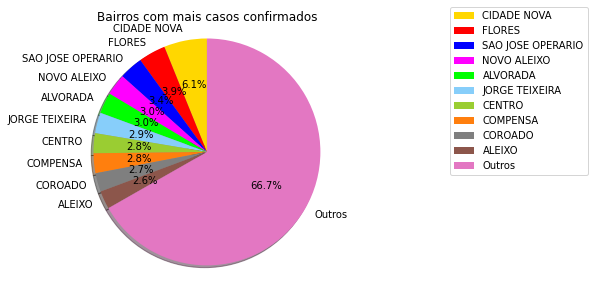

In [191]:

cores=['gold', 'red', 'blue', 'magenta', 'lime','lightskyblue',
       'yellowgreen', 'tab:orange', 'tab:gray', 'tab:brown',
        'tab:pink']

# Atribuindo um título ao gráfico
plt.title('Bairros com mais casos confirmados')

plt.pie(n_casos, labels=nome_locais, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome_locais, bbox_to_anchor=(1.3, 1.1))

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

### 2.2.1 - Distribuição dos 10 bairros com mais casos confirmados, incluindo demais bairros

## ----------------------------------------------------------------------------------------------------------
#### Atividade 2.2.2
#### Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

In [192]:
data['_sexo'].value_counts()

F    43798
M    35707
Name: _sexo, dtype: int64

In [193]:
data['_sexo']

131       F
145       F
154       F
159       F
197       F
         ..
243924    M
243974    M
243978    F
243980    F
243983    F
Name: _sexo, Length: 79505, dtype: object

        Modificamos o Dtpye da Coluna '_idade', de 'objet' para 'float', para aplicarmos o BoxPlot

In [194]:
data['_idade'] = data['_idade'].astype(float, errors = 'raise')

<AxesSubplot:title={'center':'_idade'}, xlabel='_sexo'>

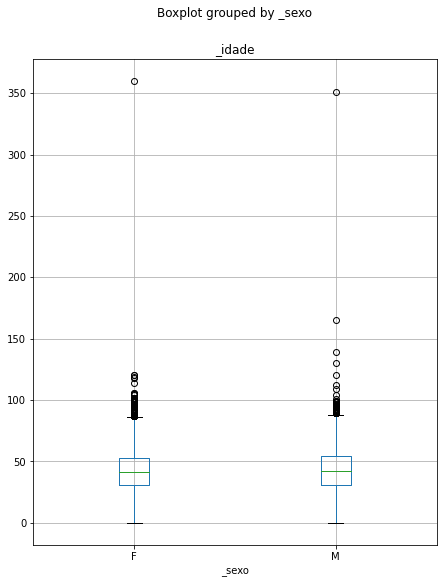

In [195]:
data.boxplot(column=['_idade'],by='_sexo',figsize=(7,9))

In [196]:
x = data.loc[data['_idade']>=150]

In [197]:
x.index

Int64Index([23222, 59745, 83433], dtype='int64')

Podemos considerar remover estes dados do dataset([23222,59745,83433]), pois estes estão com dados incorretos.

#### Como podemos ver, há muitos outliners, acumulando principalmente entre as idades próximas a 80 e 100 anos,

# -----------------------------------------------------------------------------------------

#### Atividade 2.2.3
#### Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

In [198]:
data['_dt_notificacao']=pd.to_datetime(data['_dt_notificacao'])
#fazemos a conversão da coluna para Datetime

    Realizamos a soma das datas de acordo com a data de notificação (value_counts()), realizamos a ordenacão dessas somas (sort_index()), e selecionamos os últimos 10 dias ([-10]), e aplicamos a plotagem.

<AxesSubplot:title={'center':'Casos novos confirmados nos últimos 10 dias'}>

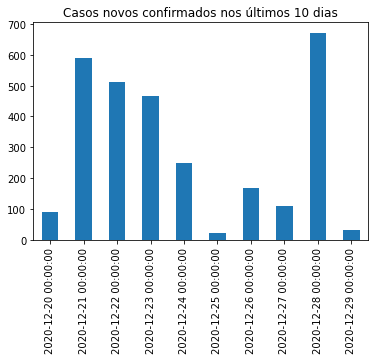

In [199]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos novos confirmados nos últimos 10 dias')

In [200]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

290.5

#### Com o gráfico, verificamos a quantidade de novos casos, nos útimos 10 dias do DataSet, com uma média de 290 casos nesse intervalo.

# -----------------------------------------------------------------------------------------

#### Atividade 2.2.4
#### Repita o gráfico anterior considerando o número de casos recuperados;

    Realizamos a mesma ideia da questão passada: realizamos a contagem de acordo com as datas, ordenamos e separamos as 10 mais recentes.

<AxesSubplot:title={'center':'Casos recuperados nos últimos 10 dias'}>

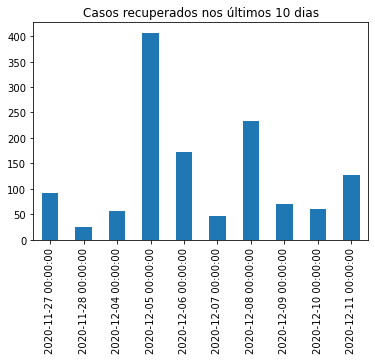

In [201]:
recuperados = data.loc[data['_conclusao']=='Recuperado']
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos recuperados nos últimos 10 dias')

In [202]:
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

128.9

#### Com o gráfico, verificamos a quantidade dos ultimos casos recuperados, nos útimos 10 dias disponiveis no DataSet, com uma média de 129 recuperados nesse intervalo.

# ------------------------------------------------------------------------------------------------------

#### Atividade 2.2.5
<h4> Construa um histograma que denote a quantidade percentual de casos por grupo etário, con-
siderando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.). </h4>

Para a averiguação do resultado do histograma será preenchida a coluna da faixa etária
com o resultado da função cut do pandas colocando como bins os valores que iniciam
os intervalos sugeridos, ignorando o membro a direita dos grupos.
> Ex: `[0,11]` irá colocar em um grupo `{0,1,2,3,4,5,6,7,8,9,10}`

In [203]:
bins = [0]
labels = []
max_age = 130

#conversão da coluna idade para tipo inteiro
data['_idade'] = data['_idade'].astype(int)
filtered_data = data[data['_idade'] <= max_age]
int_age = filtered_data['_idade']

#construção da lista de bins
for i in range(11,max_age,10):
        bins.append(i)

#construção da lista de labels a partir dos valores dos bins
for i in bins[:-1]:
    if i == 0:
        labels.append("{} a {} anos".format(i, i+10))
    else:
        labels.append("{} a {} anos".format(i, i+9))

#substituindo os valores da coluna existente de faixa etária pelos valores desejados
data['_faixa etária'] = pd.cut(int_age , bins=bins, labels=labels, right=False)

#agrupando os dados pelas faixas etárias semelhantes
age_range_group = data.groupby("_faixa etária")['_dt_notificacao'].count()

total_qtd = age_range_group.sum()
print("O total de registros é {}".format(total_qtd), end="\n\n")
print(age_range_group,end="\n\n")
for i in age_range_group:
    print("{} representa {:.2f} do total".format(i, i/total_qtd))

O total de registros é 79500

_faixa etária
0 a 10 anos        2551
11 a 20 anos       3873
21 a 30 anos      12231
31 a 40 anos      18917
41 a 50 anos      18200
51 a 60 anos      12310
61 a 70 anos       6808
71 a 80 anos       3114
81 a 90 anos       1219
91 a 100 anos       259
101 a 110 anos       11
111 a 120 anos        7
Name: _dt_notificacao, dtype: int64

2551 representa 0.03 do total
3873 representa 0.05 do total
12231 representa 0.15 do total
18917 representa 0.24 do total
18200 representa 0.23 do total
12310 representa 0.15 do total
6808 representa 0.09 do total
3114 representa 0.04 do total
1219 representa 0.02 do total
259 representa 0.00 do total
11 representa 0.00 do total
7 representa 0.00 do total


<h4>Aqui está a construção do histograma a partir da coluna de idade<h4>

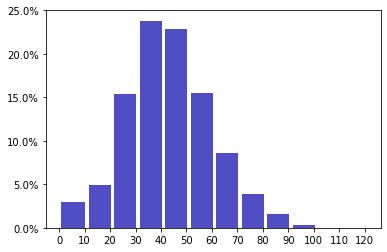

In [204]:
from matplotlib.ticker import PercentFormatter


plt.hist(int_age, bins=bins, color='#0504aa',alpha=0.7, rwidth=0.85, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(0.1))
plt.xticks(np.arange(0, bins[-1], 10))
plt.yticks(np.arange(0,0.03,0.005))
plt.show()

#### Atividade 2.2.6
#### Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

    Nesta atividade, selecionamos a coluna das datas de notificação, realizamos a soma dos casos nas respectivas datas. E realizmos a ordenação dos mesmos (sort_index()), logo em seguida utilizamos a função cumsum(), para realizar a soma acumulada de acordo com a ordem das datas.

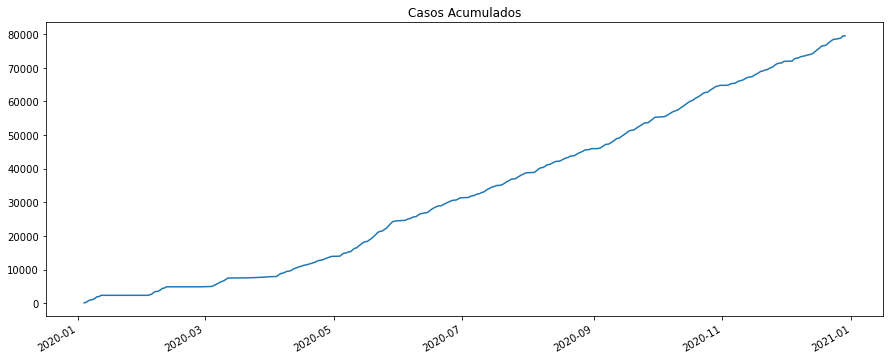

In [205]:
xxx = data['_dt_notificacao'].value_counts().sort_index().cumsum().plot(title = 'Casos Acumulados',figsize=(15,6))

#### Acumulado de casos confirmados

# ---------------------------------------------------------------------------------------

#### Atividade 2.2.7

Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado
para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível
observar alguma tendência?


Para essa questão será aproveitado o processamento feito na questão 5

In [206]:
#Valores de idades únicas
ages = int_age.sort_values().unique()

#Agrupamento e contagem de quantitativo por idade
age_group_count = filtered_data.groupby("_idade")['_dt_notificacao'].count()
print("Quantidade de casos por idade")
print(age_group_count.sort_values(ascending=False).to_string())


Quantidade de casos por idade
_idade
38     2154
40     2106
39     2051
41     2038
37     2021
42     2016
43     1966
35     1948
44     1883
36     1867
45     1845
46     1816
34     1807
48     1699
32     1691
47     1689
49     1682
33     1671
31     1601
50     1566
51     1491
52     1439
29     1431
28     1403
53     1402
30     1381
27     1352
55     1316
26     1312
25     1285
54     1271
56     1225
24     1185
57     1167
58     1089
23     1062
59      971
22      961
60      939
61      879
21      859
63      796
62      794
20      789
64      730
0       708
65      687
66      684
67      650
19      590
69      553
70      521
68      514
71      450
18      435
72      435
17      398
73      348
16      341
75      337
1       333
15      326
74      322
76      296
14      284
77      262
13      255
12      232
78      229
11      223
80      218
79      217
2       210
10      197
7       175
82      174
81      172
5       170
3       165
4       159
9  

#### Plotting scatterplot

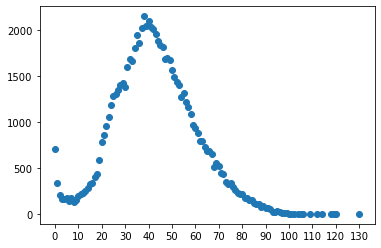

In [207]:
plt.scatter(ages, age_group_count)
plt.xticks(np.arange(0,ages[-1]+1,10))
plt.show()

Foi observado que a faixa etária entre 30 a 40 anos é a que contém mais casos

#### 2.3 - Tipos de Tarefas

2.3.1 - Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com
esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser
aplicadas? Que tipo de validação seria apropriado?

A tarefa seria predizer se o paciente irá ter uma evolução positiva **(recuperação)** ou irá vir a **óbito** a partir dos dados. 

Os atributos preditores seriam: 
>_comorb_cardio, _comorb_cromossomica, _comorb_diabetes, _comorb_hemato, _comorb_hepatica, _comorb_imuno, _comorb_neurologica, _comorb_obesidade, _comorb_renal, _comorb_respiratória, _idade, _gestante , _raca, _bairro, _sexo, _sintoma_dispneia, _sintoma_febre, _sintoma_garganta, _sintoma_tosse, _sintoma_outros, _bairro, _distrito

o atributo alvo seria:
>_conclusao

 
Com relação as métricas de validação poderiam ser utilizadas: 
> Acurácia, Precisão, Revocação, F1 score.


Por lidar com questões relacionadas a vida do paciente e medidas visando preservá-la seria interessante utilizar um método de validação mais robusto como a Validação Kfold.

2.3.2 -  Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com
esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera
relevantes para o cenário?

Predizer a taxa de recuperação do paciente a partir dos dados apresentados

O atributo alvo seria: 
>taxa

Os atributos preditores relevantes para o cenário seriam: 
>_comorb_cardio, _comorb_cromossomica, _comorb_diabetes, _comorb_hemato, _comorb_hepatica, _comorb_imuno, _comorb_neurologica, _comorb_obesidade, _comorb_renal, _comorb_respiratória, _idade, _gestante , _raca, _bairro, _sexo, _sintoma_dispneia, _sintoma_febre, _sintoma_garganta, _sintoma_tosse, _sintoma_outros, _bairro, _distrito

E a métrica de desempenho utilizada seria o MSE (Mean Squared Error)